# Project description

## Introduction of the project

The data we have contains data on books, publishers, authors, and customer ratings and reviews of books.

The goal of the project is to use this information to generate a value proposition for a new product.


## Outline of the analysis

* Check the data, study the tabels we have.
* Use an SQL querys to find the infomation we need for each task.
* Use alians, joins and subquerys to get the best results.

### Description of the data

Here we will look at the description of the data we have, we have 5 different tables.

`**books**`

Contains data on books:

- `book_id`
- `author_id`
- `title`
- `num_pages` — number of pages
- `publication_date`
- `publisher_id`

`**authors**`

Contains data on authors:

- `author_id`
- `author`

`**publishers**`

Contains data on publishers:

- `publisher_id`
- `publisher`

`**ratings**`

Contains data on user ratings:

- `rating_id`
- `book_id`
- `username` — the name of the user who rated the book
- `rating`

`**reviews**`

Contains data on customer reviews:

- `review_id`
- `book_id`
- `username` — the name of the user who reviewed the book
    
    
- `text` — the text of the review

# Data Diagram

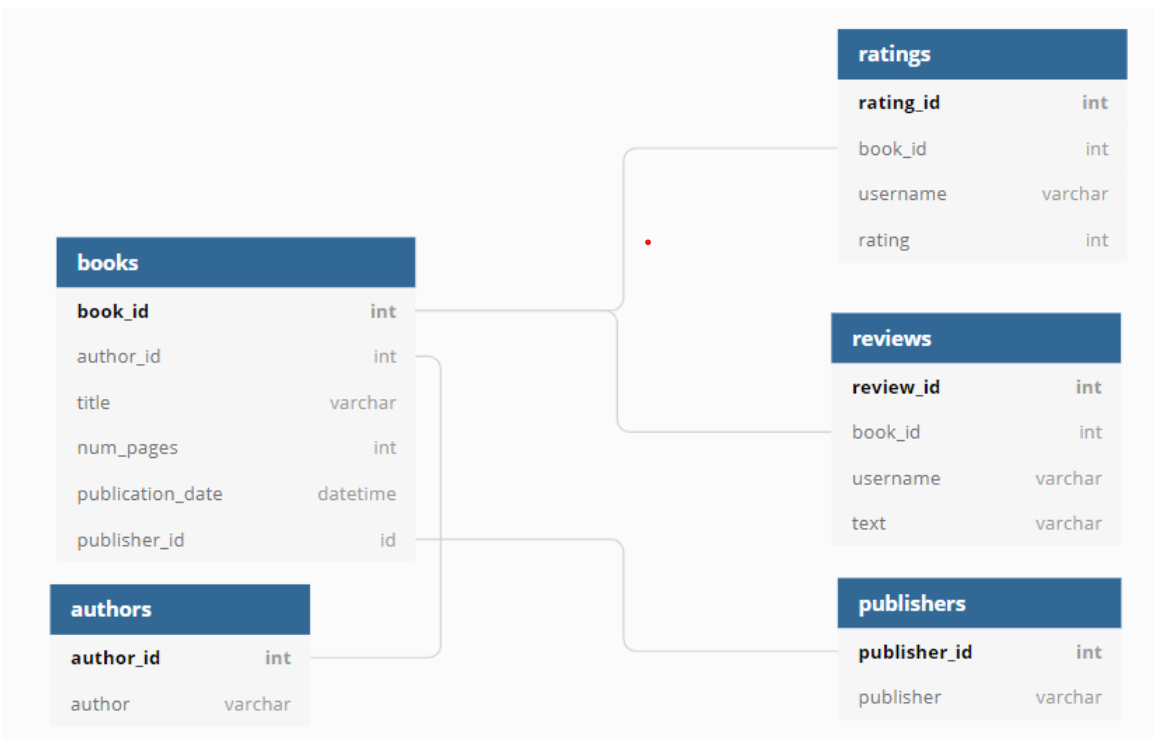

# Creating Connecting to the Data Base 

Here I'm to create the connection to the data base, I'll create and connect to the engine so I can do querys on the data from the server.

In [1]:
# import libraries
import pandas as pd
from sqlalchemy import create_engine

In [2]:
db_config = {'user': 'praktikum_student',         # user name
             'pwd': 'Sdf4$2;d-d30pp', # password
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432,              # connection port
             'db': 'data-analyst-final-project-db'}          # the name of the data base

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                                     db_config['pwd'],
                                                                       db_config['host'],
                                                                       db_config['port'],
                                                                       db_config['db'])

engine = create_engine(connection_string, connect_args={'sslmode':'require'})

# Looking at the Data Base

I'll take a look at each of the tables to see how it looks and what it contains.

**Books Table**

In [3]:
query = """
SELECT * 
FROM books
"""

In [4]:
pd.io.sql.read_sql(query, con = engine)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268
...,...,...,...,...,...,...
995,996,571,Wyrd Sisters (Discworld #6; Witches #2),265,2001-02-06,147
996,997,454,Xenocide (Ender's Saga #3),592,1996-07-15,297
997,998,201,Year of Wonders,358,2002-04-30,212
998,999,94,You Suck (A Love Story #2),328,2007-01-16,331


**Authors Table**

In [5]:
query = """
SELECT * 
FROM authors
"""

In [6]:
pd.io.sql.read_sql(query, con = engine)

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd
...,...,...
631,632,William Strunk Jr./E.B. White
632,633,Zadie Smith
633,634,Zilpha Keatley Snyder
634,635,Zora Neale Hurston


**Publishers Table**

In [7]:
query = """
SELECT * 
FROM publishers
"""

In [8]:
pd.io.sql.read_sql(query, con = engine)

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company
...,...,...
335,336,Workman Publishing Company
336,337,Wyatt Book
337,338,Yale University Press
338,339,Yearling


**Ratings Table**

In [9]:
query = """SELECT * FROM ratings"""

In [10]:
pd.io.sql.read_sql(query, con = engine)

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2
...,...,...,...,...
6451,6452,1000,carolrodriguez,4
6452,6453,1000,wendy18,4
6453,6454,1000,jarvispaul,5
6454,6455,1000,zross,2


**Reviews Table**

In [11]:
query = """
SELECT * 
FROM reviews
"""

In [12]:
pd.io.sql.read_sql(query, con = engine)

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...
...,...,...,...,...
2788,2789,999,martinadam,Later hospital turn easy community. Fact same ...
2789,2790,1000,wknight,Change lose answer close pressure. Spend so now.
2790,2791,1000,carolrodriguez,Authority go who television entire hair guy po...
2791,2792,1000,wendy18,Or western offer wonder ask. More hear phone f...


# Find the number of books released after January 1, 2000

To find this I'll create a query that will select all the data from the `books` data frame, and I'll specify in the `WHERE` operator to take only the data where the `publication_date` column is equal or bigger then `2000-01-01`.

And I'll use `ORDER BY` to order the data by the `publication_date` in ascending order to make sure that we don't have any data prior to the `2000-01-01`.

I'll add the same query but that we check any data the is equal or bigger then the `2000-01-01` to see if we have any books that released at the `2000-01-01` just in case we might want them also.

I'll also add a small query that will use the `COUNT(*)` to count all the book by the date I'll give them to get only the count number.

**The data after the `2000-01-01` not included the `2000-01-01`**

In [13]:
query = """
SELECT * 
FROM books 
WHERE publication_date > '2000-01-01'
ORDER BY publication_date
"""

pd.io.sql.read_sql(query, con = engine)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,77,414,Angels Flight (Harry Bosch #6; Harry Bosch Un...,454,2000-01-05,327
1,778,571,The Light Fantastic (Discworld #2; Rincewind #2),277,2000-02-02,143
2,736,231,The Gods Themselves,288,2000-02-10,182
3,725,515,The Firm,76,2000-02-15,5
4,934,30,Traveling Mercies: Some Thoughts on Faith,275,2000-02-15,15
...,...,...,...,...,...,...
814,993,80,Women,291,2014-07-29,99
815,293,80,Ham on Rye,288,2014-07-29,99
816,445,612,Monster,281,2019-03-05,14
817,635,166,The Art of Loving,192,2019-08-06,130


In [14]:
query = """
SELECT COUNT(*) 
FROM books 
WHERE publication_date > '2000-01-01'
"""

pd.io.sql.read_sql(query, con = engine)

,count
0,819


**The data from the `2000-01-01` included**

In [15]:
query = """
SELECT * 
FROM books 
WHERE publication_date >= '2000-01-01'
ORDER BY publication_date
"""

pd.io.sql.read_sql(query, con = engine)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,567,555,Shopgirl,130,2000-01-01,122
1,44,604,A Room of One's Own,112,2000-01-01,212
2,77,414,Angels Flight (Harry Bosch #6; Harry Bosch Un...,454,2000-01-05,327
3,778,571,The Light Fantastic (Discworld #2; Rincewind #2),277,2000-02-02,143
4,736,231,The Gods Themselves,288,2000-02-10,182
...,...,...,...,...,...,...
816,993,80,Women,291,2014-07-29,99
817,293,80,Ham on Rye,288,2014-07-29,99
818,445,612,Monster,281,2019-03-05,14
819,635,166,The Art of Loving,192,2019-08-06,130


In [16]:
query = """
SELECT COUNT(*) 
FROM books 
WHERE publication_date >= '2000-01-01'
"""

pd.io.sql.read_sql(query, con = engine)

,count
0,821


**Conclusion:**

As we can see first we have two books released at the `2000-01-01`, we have a count of over 800 books out of all of our 1000 books data that released after the `2000-01-01`.

We can see that the majority of books in our data released after the `2000-01-01`.

# Find the number of user reviews and the average rating for each book

To find this I'll use the `LEFT OUTER JOIN`, I'll choose in the SELECT the `title` from the `books` data frame, the `review_id` from the `reviews` data frame and `rating` from the `ratings` data frame columns and in the `FROM` I'll choose the first data frame which is `books` and I'll use alias to name it `b`, right after it I'll join this table using the `LEFT OUTER JOIN` to join it with the second data frame `ratings` which will get the alias `rat` for the joining and right after this I'll join this table one more time using `LEFT OUTER JOIN` again with the third data frame `reviews` which will get the alias `rev` and I'll group the data by the `book_id` column.

I'm using the `LEFT OUTHER JOIN` to make sure that I'll not lose any data in the joining.

And I'll use the `ORDER BY` to order the data by the `title` column just to order it by the alphabet order.

In [17]:
query = """
SELECT b.title AS book_title, COUNT(rev.review_id) AS reviews_number ,ROUND(AVG(rat.rating), 2) AS average_rating 
FROM books AS b 
LEFT OUTER JOIN ratings AS rat ON b.book_id = rat.book_id 
LEFT OUTER JOIN reviews AS rev ON b.book_id = rev.book_id 
GROUP BY b.book_id
ORDER BY reviews_number DESC
"""

pd.io.sql.read_sql(query, con = engine)

,book_title,reviews_number,average_rating
0,Twilight (Twilight #1),1120,3.66
1,The Hobbit or There and Back Again,528,4.13
2,The Catcher in the Rye,516,3.83
3,Harry Potter and the Prisoner of Azkaban (Harr...,492,4.41
4,Harry Potter and the Chamber of Secrets (Harry...,480,4.29
...,...,...,...
995,Essential Tales and Poems,0,4.00
996,The Natural Way to Draw,0,3.00
997,Disney's Beauty and the Beast (A Little Golden...,0,4.00
998,Anne Rice's The Vampire Lestat: A Graphic Novel,0,3.67


In [18]:
query = '''SELECT title, COUNT(review_id) AS reviews_number,  AVG(rating) AS avg_rating 
            FROM(( books
            LEFT OUTER JOIN ratings ON ratings.book_id = books.book_id)
            LEFT OUTER JOIN reviews ON reviews.book_id = ratings.book_id)
            GROUP BY books.book_id
            ORDER BY reviews_number DESC  '''

pd.io.sql.read_sql(query, con = engine)

,title,reviews_number,avg_rating
0,Twilight (Twilight #1),1120,3.662500
1,The Hobbit or There and Back Again,528,4.125000
2,The Catcher in the Rye,516,3.825581
3,Harry Potter and the Prisoner of Azkaban (Harr...,492,4.414634
4,Harry Potter and the Chamber of Secrets (Harry...,480,4.287500
...,...,...,...
995,Essential Tales and Poems,0,4.000000
996,The Natural Way to Draw,0,3.000000
997,Disney's Beauty and the Beast (A Little Golden...,0,4.000000
998,Anne Rice's The Vampire Lestat: A Graphic Novel,0,3.666667


In [19]:
query = """
SELECT b.title AS book_title, COUNT(DISTINCT(rev.review_id)) AS reviews_number ,ROUND(AVG(rat.rating), 2) AS average_rating 
FROM books AS b 
LEFT OUTER JOIN ratings AS rat ON b.book_id = rat.book_id 
LEFT OUTER JOIN reviews AS rev ON b.book_id = rev.book_id 
GROUP BY b.book_id
ORDER BY reviews_number DESC
"""

pd.io.sql.read_sql(query, con = engine)

,book_title,reviews_number,average_rating
0,Twilight (Twilight #1),7,3.66
1,Water for Elephants,6,3.98
2,The Glass Castle,6,4.21
3,Harry Potter and the Prisoner of Azkaban (Harr...,6,4.41
4,The Curious Incident of the Dog in the Night-Time,6,4.08
...,...,...,...
995,Anne Rice's The Vampire Lestat: A Graphic Novel,0,3.67
996,The Natural Way to Draw,0,3.00
997,The Cat in the Hat and Other Dr. Seuss Favorites,0,5.00
998,Essential Tales and Poems,0,4.00


**Conclusion:**

We now have a new data frame that contains the name of each book, the number of reviews it get and the average rating, which can help us in the future if we whould like to see something of specific book, of to look at any connection between top-selling books and least selling books.

# Identify the publisher that has released the greatest number of books with more than 50 pages 

To find this I'll use `LEFT OUTER JOIN` where I'll join the `books` data frame with the `publishers` data frame, I'll use the `COUNT` operator to count the number of books that each publisher released and I'll use the `ORDER BY` with `DESC` to order the table in descending by the number of books released.

And I'll use the `WHERE` operator to get only the books with the number of pages that is more then 50 pages for book.

And of course I'll group the data by the `publisher`.

In [20]:
query =""" 
SELECT pub.publisher, COUNT(book_id) AS number_of_books
FROM books AS b LEFT OUTER JOIN publishers AS pub ON b.publisher_id=pub.publisher_id 
WHERE b.num_pages > 50 
GROUP BY pub.publisher 
ORDER BY number_of_books DESC
"""

pd.io.sql.read_sql(query, con = engine)

,publisher,number_of_books
0,Penguin Books,42
1,Vintage,31
2,Grand Central Publishing,25
3,Penguin Classics,24
4,Ballantine Books,19
...,...,...
329,Turtleback,1
330,Atheneum Books for Young Readers: Richard Jack...,1
331,Penguin Signet,1
332,Victor Gollancz,1


**Conclusion:**

As we can see the publisher that has released the greatest number of books with more than 50 pages is the `Penguin Books` publisher with 42 books released.

# Identify the author with the highest average book rating (look only at books with at least 50 ratings)

To find this I'll use alias, I'll call the `books` data frame b, the `authors` data frame a, and the `ratings` data frame r.

Then I'll select the column of the authors name from the `authors` data frame, and I'll use the `COUNT` oprator to count the number of rating each author get.

I'll use LEFT OUTER JOIN so non of the information get lost, and I'll group the data by the author name.

Since they asked to look only at books with at least 50 ratings I'll add in the `HAVING` oprator to get only the books that are in the `ratings` data frame and are get more then 50 ratings in number.

In [21]:
query = """
WITH
b AS (SELECT * FROM books),
a AS (SELECT * FROM authors),
r AS (SELECT * FROM ratings)

SELECT a.author, COUNT(r.rating) AS rating_count, AVG(r.rating) AS AVG_rating
FROM b LEFT OUTER JOIN r ON b.book_id = r.book_id
LEFT OUTER JOIN a ON b.author_id = a.author_id
GROUP BY a.author
HAVING COUNT(r.book_id) > 50
ORDER BY AVG_rating DESC
LIMIT 1

"""

pd.io.sql.read_sql(query, con = engine)

,author,rating_count,avg_rating
0,J.K. Rowling/Mary GrandPré,312,4.288462


In [22]:
query = """
WITH
b AS (SELECT * FROM books),
a AS (SELECT * FROM authors),
r AS (SELECT * FROM ratings)

SELECT a.author, COUNT(r.rating) AS rating_count, AVG(r.rating) AS AVG_rating
FROM b LEFT OUTER JOIN r ON b.book_id = r.book_id
LEFT OUTER JOIN a ON b.author_id = a.author_id
GROUP BY a.author
HAVING COUNT(r.book_id) >= 50
ORDER BY AVG_rating DESC
LIMIT 1

"""

pd.io.sql.read_sql(query, con = engine)

,author,rating_count,avg_rating
0,Diana Gabaldon,50,4.3


**Conclusion:**

As we can see from the outcome we got the author with the highest average book rating that have at least over 50 ratings is `J.K. Rowling/Mary GrandPré` with an average rating of `4.288462` and a count of `312` rating.

And the author with the highest average book rating that have at least 50 ratings, equal to and over is `Diana Gabaldon` with an average rating of `4.3` and a count of `50` rating.

`Diana Gabaldon` got an higher result then `J.K. Rowling/Mary GrandPré`.

# Find the average number of text reviews among users who rated more than 50 books

To find this I'll use alias, I'll call the `ratings` table `ra` and I'll `SELECT` from it the username and I'll count the rating column, I'll group the data by the `username` so we will have the number of ratings each user rate overall and in the `HAVING` oprator I'll take only the users that rated more then 50 books.

Then I'll use another alias for the `reviews` table I'll name it `re` I'll use `SELECT` from this table the username and I'll count the amount of text reviews each username has given using the `text` column, I'll group the data by the `username`.

Then I'll create the query and I'll `SELECT` the `text_count` from the reviwes table and I'll use the `AVG` oprator on it to get the average, then I'll use the `RIGHT JOIN` to join the dataon the username from both tables but in preference for
 the reviews table.

In [23]:
query = """
WITH 

ra AS (SELECT username, COUNT(rating) 
       FROM ratings
       GROUP BY username
       HAVING COUNT(username) > 50 ),
       
re AS (SELECT username, COUNT(text) AS text_count
       FROM reviews
       GROUP BY username)
       
SELECT AVG(re.text_count)
FROM re 
RIGHT JOIN ra ON ra.username=re.username

"""

pd.io.sql.read_sql(query, con = engine)

,avg
0,24.333333


**Concolsion:**

We see that the average number of text reviews among users who rated more than 50 books is 24.3, we can see it's 24.

Users who rated more then 50 books will like to add a text review for almost 1 of 2 books they rated.

# Conclusion:

We have been given a database of one of the services competing in the book apps market. It contains data on books, publishers, authors, and customer ratings and reviews of books. 

We needed to use this information generate a value proposition for a new product. 

We started by taking a look at each of the tables to see what we are dealing with.

We created a new data frame that containing the number of books released after January 1, 2000, we actually created two, one that is after the January 1, 2000 and one that contains also the books that released at the January 1, 2000.

We can use this data frame for later analysis, if we will like to check anything about this data we will have this table.

We also created a data frame that have the number of user reviews and the average rating for each book, which is also can help us in the future if we will like to make any analysis on this kind of data.

And we created a data frame that have the name of each publisher and the number of books he released in books with more than 50 pages, this can also came in handy in the future.

The last data frame we created is a data frame that contains the authors names, the amount of rating each author get and the average rating overall for each author, this data frame can also help us in the future for analysis authors.

Each data frame we created can be updated automatically because the querys are already made and we only need to update the data in the server.

The last query we did, which can also updated automatically its not a table but a calculation of the average number of text reviews among users who rated more than 50 books, which we found out to be 24, which is around every more then two books that each user rate he will likely to leave a text review.